<a href="https://colab.research.google.com/github/GayathriG14/MV_DA1/blob/main/20BPS1048_GAYATHRI_G_DA2_MV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

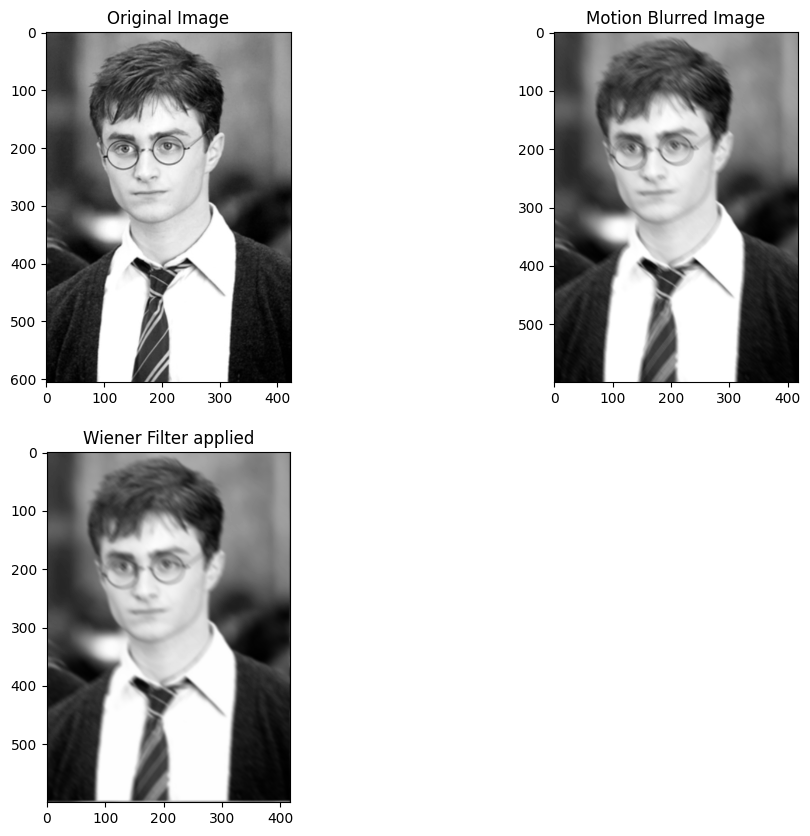

In [5]:
#Wiener Filter and Motion Blurred Image
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

def blur(img, kernel_size = 3):
    dummy = np.copy(img)
    h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


if __name__ == '__main__':
# Load image and convert it to gray scale
    file_name = os.path.join('harry.png') 
    img = rgb2gray(plt.imread(file_name))

# Blur the image
    blurred_img = blur(img, kernel_size = 7)


# Apply Wiener Filter
    kernel = gaussian_kernel(5)
    filtered_img = wiener_filter(blurred_img, kernel, K = 10)

# Display results
    display = [img, blurred_img, filtered_img]
    label = ['Original Image', 'Motion Blurred Image', 'Wiener Filter applied']
    fig = plt.figure(figsize=(12, 10))
    
    for i in range(len(display)):
        fig.add_subplot(2, 2, i+1)
        plt.imshow(display[i], cmap = 'gray')
        plt.title(label[i])

    plt.show()

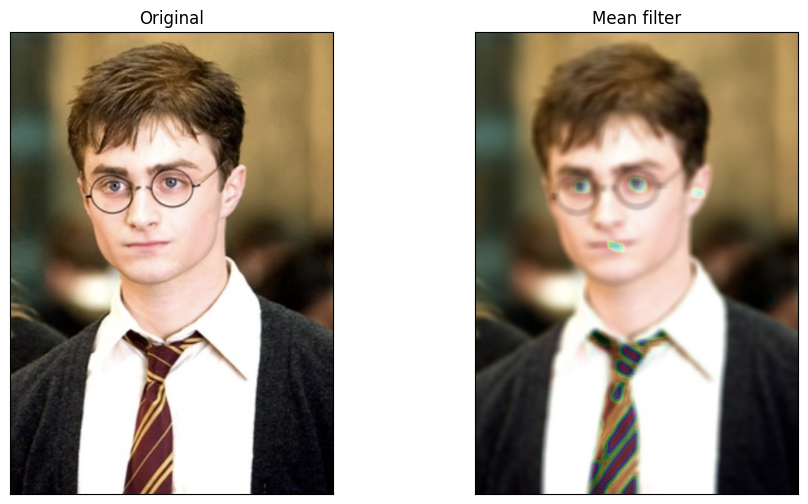

In [8]:
#Mean filter
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('harry.png') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

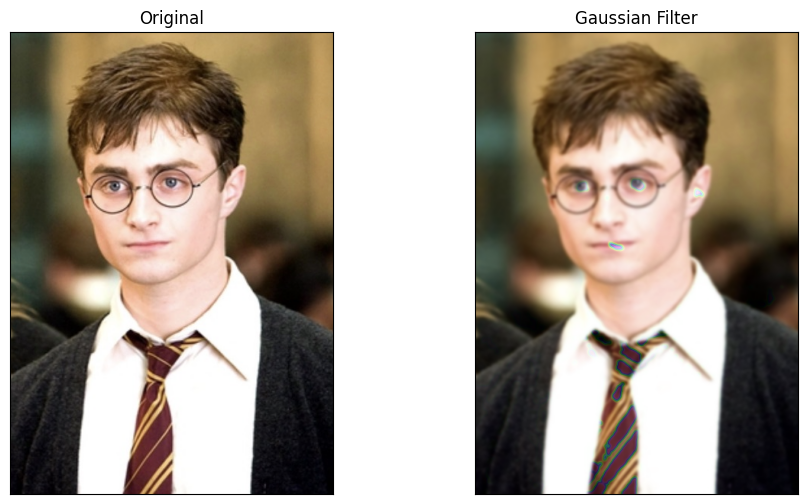

In [9]:
#Gaussian Filter
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

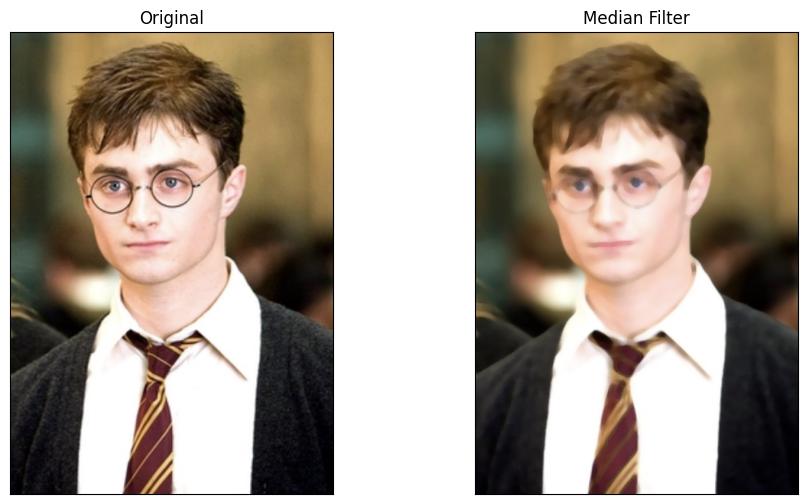

In [11]:
#Median Filter
new_image = cv2.medianBlur(image, figure_size)

plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

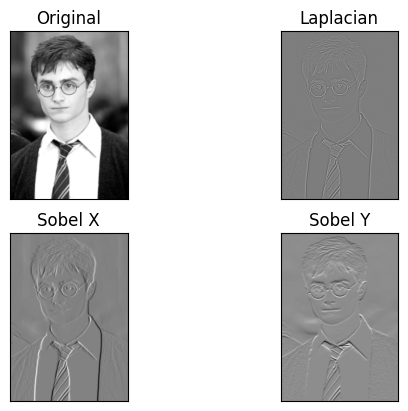

In [19]:
#laplacian
import cv2
import numpy as np
from matplotlib import pyplot as plt

img0 = cv2.imread('harry.png',)

# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

(Text(0.5, 1.0, 'Low pass'), ([], []), ([], []))

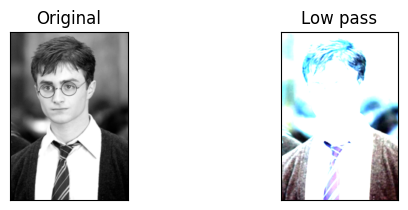

In [31]:
#low pass filter
#read image
img_src = cv2.imread('harry.png')

#prepare the 5x5 shaped filter
kernel = np.array([[1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1], 
                   [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(img_src,-1,kernel)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_rst,cmap = 'gray')
plt.title('Low pass'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'High pass'), ([], []), ([], []))

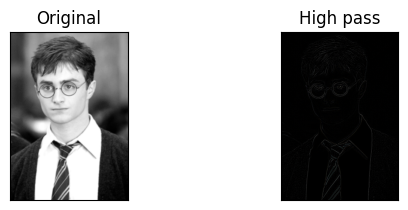

In [35]:
#High pass filter

#read image
img_src = cv2.imread('harry.png')

#edge detection filter
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)

#filter the source image
img_rst1 = cv2.filter2D(img_src,-1,kernel)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img_rst1,cmap = 'gray')
plt.title('High pass'), plt.xticks([]), plt.yticks([])

<ipython-input-38-fa3a5fa6e3fd>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


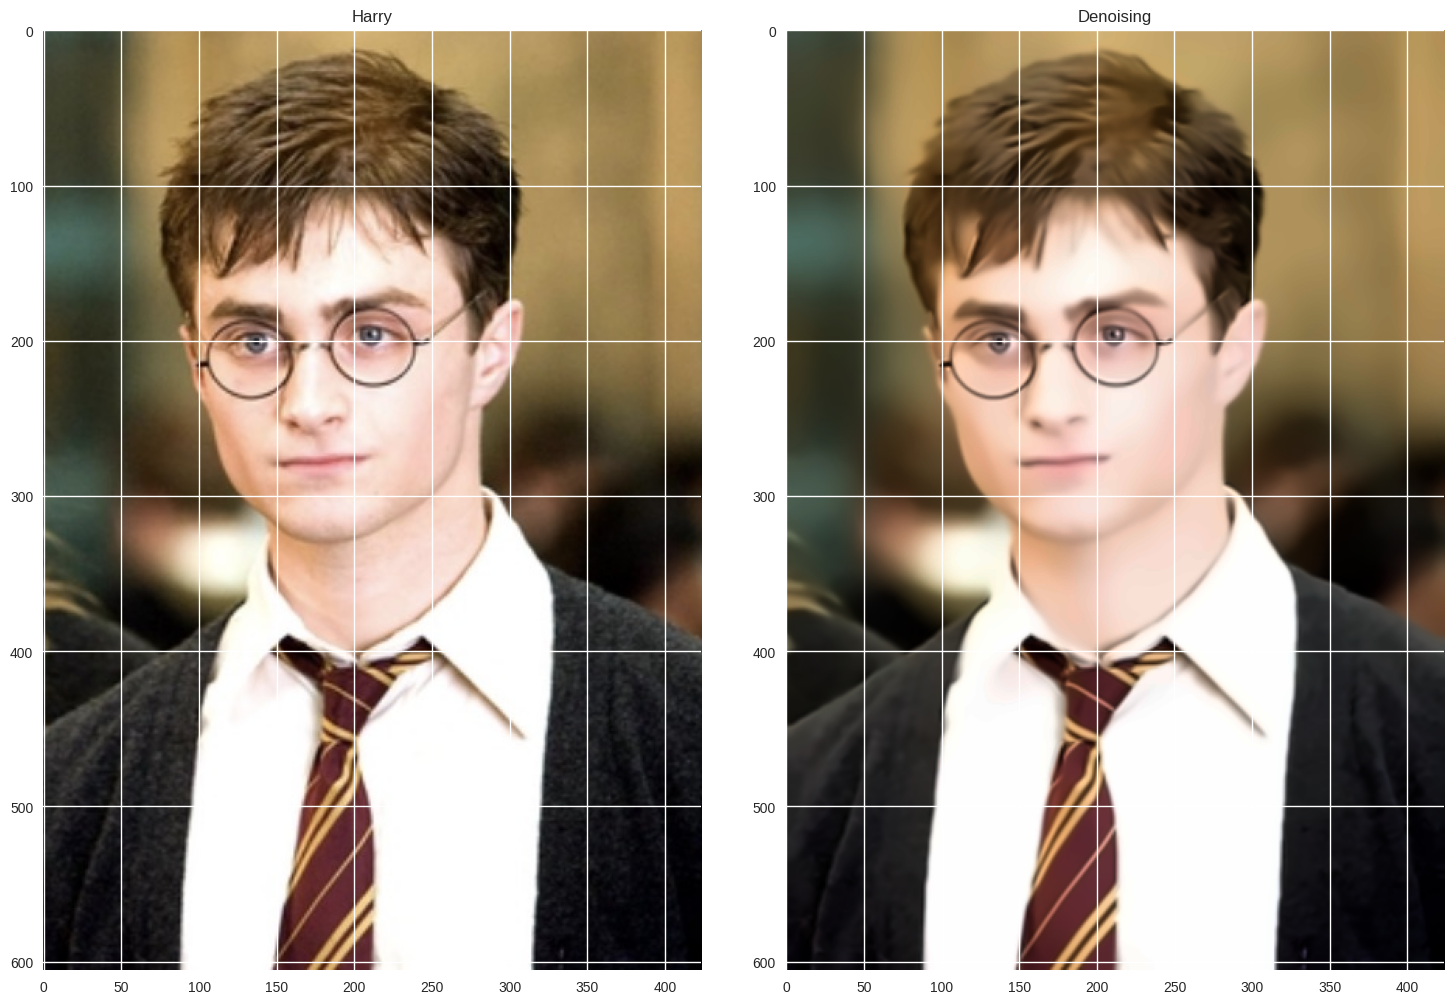

In [38]:
#Denoising
plt.style.use('seaborn')
 
image = cv2.imread('harry.png')
dst = cv2.fastNlMeansDenoisingColored(image, None, 11, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Harry')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Denoising')
plt.show()

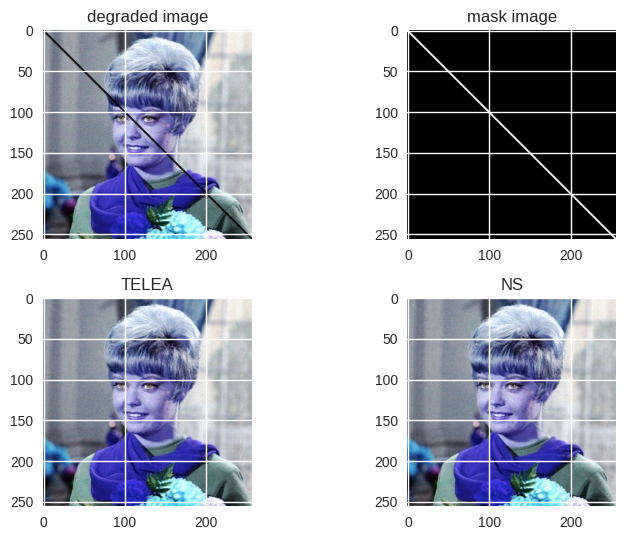

In [61]:
#Inpainting
import numpy as np
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('girl.jpeg')     # input
mask = cv2.imread('girl_mask.jpeg',0)  # mask

dst_TELEA = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
dst_NS = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)

plt.subplot(221), plt.imshow(img)
plt.title('degraded image')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.title('mask image')
plt.subplot(223), plt.imshow(dst_TELEA)
plt.title('TELEA')
plt.subplot(224), plt.imshow(dst_NS)
plt.title('NS')

plt.tight_layout()
plt.show()